<a href="https://colab.research.google.com/github/D3stro9er/neural-networks/blob/main/lab4/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота №4
###студента групи Анд-31
###Українець Андрій
###Варіант №11

#Завдання №1
### Для моделювання використати 3 класи індекси яких взяти відповідно до номеру у списку групи(0, 5, 7).
### Моделювання провести із використанням нейронної мережі (Flatten & Dense layers).


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

In [4]:
( train_data ,  train_labels ),  ( test_data ,  test_labels )  =  fashion_mnist . load_data ()

4431872/4422102 [==============================] - 0s 0us/step


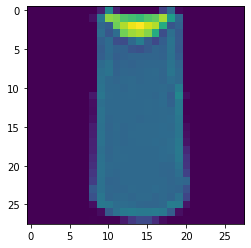

In [5]:
plt.imshow(train_data[2])

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_data = train_data[np.where(np.in1d(train_labels, [0, 5, 7]))]
train_labels = train_labels[np.where(np.in1d(train_labels, [0, 5, 7]))]
test_data = test_data[np.where(np.in1d(test_labels, [0, 5, 7]))]
test_labels = test_labels[np.where(np.in1d(test_labels, [0, 5, 7]))]
class_names_1 = [class_names[i] for i in [0, 5, 7]]

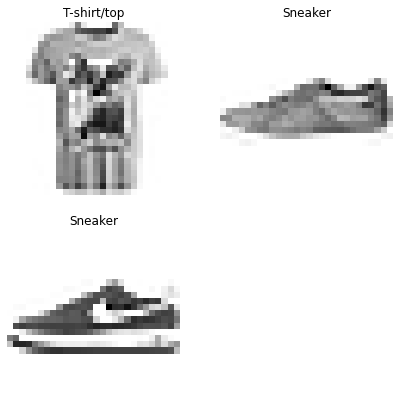

In [8]:
import random
plt.figure(figsize=(7, 7))
for i in range(3):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [9]:
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))


Epoch 1/10
563/563 [==============================] - 2s 2ms/step - loss: 1.9791 - accuracy: 0.4551 - val_loss: 1.1958 - val_accuracy: 0.4897
Epoch 2/10
563/563 [==============================] - 1s 2ms/step - loss: 0.9933 - accuracy: 0.5316 - val_loss: 0.8590 - val_accuracy: 0.6023
Epoch 3/10
563/563 [==============================] - 1s 1ms/step - loss: 0.7393 - accuracy: 0.6240 - val_loss: 0.5717 - val_accuracy: 0.7923
Epoch 4/10
563/563 [==============================] - 1s 2ms/step - loss: 0.4666 - accuracy: 0.8383 - val_loss: 0.3712 - val_accuracy: 0.8767
Epoch 5/10
563/563 [==============================] - 1s 1ms/step - loss: 0.3438 - accuracy: 0.8824 - val_loss: 0.2960 - val_accuracy: 0.9143
Epoch 6/10
563/563 [==============================] - 1s 1ms/step - loss: 0.2872 - accuracy: 0.9012 - val_loss: 0.4835 - val_accuracy: 0.7940
Epoch 7/10
563/563 [==============================] - 1s 2ms/step - loss: 0.2446 - accuracy: 0.9138 - val_loss: 0.2486 - val_accuracy: 0.9333
Epoch 

In [10]:
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


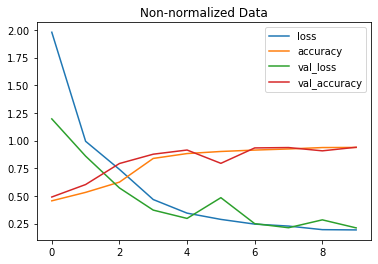

In [15]:
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")

In [11]:
#Confusion matrix
predicted_labels1 = model_11.predict(test_data)
predicted_labels1 = predicted_labels1.argmax(axis=1)
print(f"Model 1, not normalized data:\n {confusion_matrix(y_true=test_labels, y_pred=predicted_labels1)}")

Model 1, not normalized data:
 [[999   0   1]
 [  7 926  67]
 [  2 105 893]]


In [12]:
#Normalize data
train_data = train_data / 255.0
test_data = test_data / 255.0
train_data.min(), train_data.max()

(0.0, 1.0)

In [13]:
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
563/563 [==============================] - 1s 2ms/step - loss: 0.3836 - accuracy: 0.8870 - val_loss: 0.1261 - val_accuracy: 0.9603
Epoch 2/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1075 - accuracy: 0.9653 - val_loss: 0.0908 - val_accuracy: 0.9667
Epoch 3/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0872 - accuracy: 0.9723 - val_loss: 0.0875 - val_accuracy: 0.9663
Epoch 4/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0779 - accuracy: 0.9733 - val_loss: 0.0951 - val_accuracy: 0.9670
Epoch 5/10
563/563 [==============================] - 1s 2ms/step - loss: 0.0730 - accuracy: 0.9742 - val_loss: 0.0903 - val_accuracy: 0.9683
Epoch 6/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0694 - accuracy: 0.9759 - val_loss: 0.0679 - val_accuracy: 0.9750
Epoch 7/10
563/563 [==============================] - 1s 1ms/step - loss: 0.0658 - accuracy: 0.9768 - val_loss: 0.0697 - val_accuracy: 0.9727
Epoch 

In [14]:
predicted_labels2 = model_12.predict(test_data)
predicted_labels2 = predicted_labels2.argmax(axis=1)
print(f"Model 2, normalized data:\n {confusion_matrix(y_true=test_labels, y_pred=predicted_labels2)}")

Model 2, normalized data:
 [[999   1   0]
 [  1 963  36]
 [  0  33 967]]


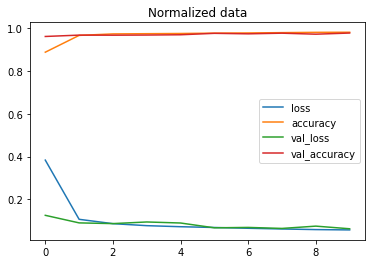

In [16]:
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [22]:
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
563/563 [==============================] - 1s 2ms/step - loss: 0.5685 - accuracy: 0.7828 - val_loss: 0.1545 - val_accuracy: 0.9557 - lr: 0.0010
Epoch 2/40
563/563 [==============================] - 1s 1ms/step - loss: 0.1225 - accuracy: 0.9643 - val_loss: 0.1014 - val_accuracy: 0.9653 - lr: 0.0011
Epoch 3/40
563/563 [==============================] - 1s 1ms/step - loss: 0.1016 - accuracy: 0.9686 - val_loss: 0.1107 - val_accuracy: 0.9613 - lr: 0.0013
Epoch 4/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0921 - accuracy: 0.9696 - val_loss: 0.0945 - val_accuracy: 0.9670 - lr: 0.0014
Epoch 5/40
563/563 [==============================] - 1s 1ms/step - loss: 0.0870 - accuracy: 0.9714 - val_loss: 0.0968 - val_accuracy: 0.9660 - lr: 0.0016
Epoch 6/40
563/563 [==============================] - 1s 1ms/step - loss: 0.0868 - accuracy: 0.9711 - val_loss: 0.0908 - val_accuracy: 0.9670 - lr: 0.0018
Epoch 7/40
563/563 [==============================] - 1s 1ms/step - lo

# Завдання №2
### Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate), а також побудову Confusion Matrix.


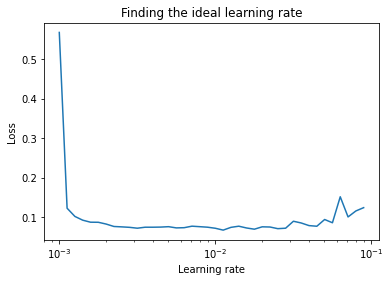

In [23]:
#learning rate
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [24]:
l_rate = min(find_lr_history.history["loss"])

In [27]:
tf.random.set_seed(42)

# Create the model
model4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), 
                 metrics=["accuracy"])

# Fit the model
history = model4.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


563/563 [==============================] - 1s 2ms/step - loss: 0.3347 - accuracy: 0.8831 - val_loss: 0.0892 - val_accuracy: 0.9687
Epoch 2/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0870 - accuracy: 0.9697 - val_loss: 0.0728 - val_accuracy: 0.9743
Epoch 3/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0716 - accuracy: 0.9761 - val_loss: 0.0887 - val_accuracy: 0.9697
Epoch 4/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0620 - accuracy: 0.9781 - val_loss: 0.0689 - val_accuracy: 0.9767
Epoch 5/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0561 - accuracy: 0.9812 - val_loss: 0.0647 - val_accuracy: 0.9777
Epoch 6/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0523 - accuracy: 0.9816 - val_loss: 0.0638 - val_accuracy: 0.9767
Epoch 7/20
563/563 [==============================] - 1s 1ms/step - loss: 0.0488 - accuracy: 0.9833 - val_loss: 0.0616 - val_accuracy: 0.9767
Epoch 8/20
563/56

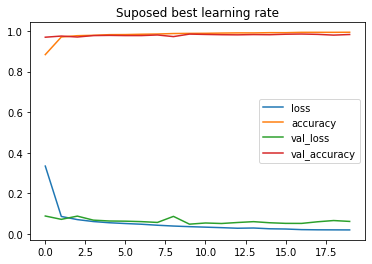

In [30]:
history4_df = pd.DataFrame(history.history)
history4_df.plot(title='Suposed best learning rate')

In [31]:
predicted_labels4 = model4.predict(test_data)
predicted_labels4 = predicted_labels4.argmax(axis=1)
print(f"Model 4, supposed best rate:\n {confusion_matrix(y_true=test_labels, y_pred=predicted_labels4)}")

Model 4, supposed best rate:
 [[998   2   0]
 [  1 979  20]
 [  0  31 969]]


Forecast check


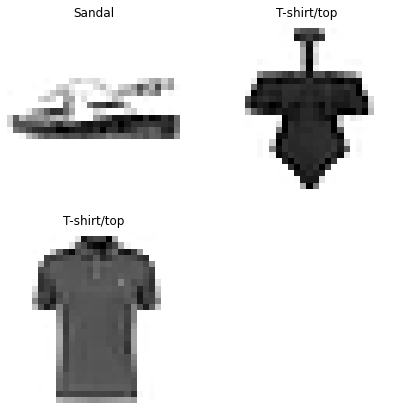

In [33]:
print("Forecast check")
plt.figure(figsize=(7, 7))
for i in range(3):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(test_data)))
  plt.imshow(test_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[predicted_labels4[rand_index]])
  plt.axis(False)

# Висновок
### В ході лабораторної роботи було розглянуто класифікацію за допомогою нейронної мережі. Для побудови нейронної мережі було використано пакет tensorflow. Також будували крафік для знаходження оптимальної к-ть епох. Будувал і confusion matrix для перевірки прогнозу. Для досягнення хороших прогнозів ми спочатку зробили звичайну нейронну мережу з двома прихованими шарами. Потім ми зробили теж саме, але нормалізували наші дані і наша точність підвищилась. Далі я добавив ще один шар та декілька нейронів у інші шари і таким чином ми отримали гарні результати.


